<a href="https://colab.research.google.com/github/JuanDaGue/GitHub/blob/master/Ps5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spiceypy

     |████████████████████████████████| 245kB 2.8MB/s 
  Created wheel for spiceypy: filename=spiceypy-2.3.1-cp36-cp36m-linux_x86_64.whl size=1809840 sha256=c6024b37168661aa8f4817e689b9bcab8cb4512141a9e788b557fa08a5c5c7d0
  Stored in directory: /root/.cache/pip/wheels/48/3f/cb/80225bada49ce963924066724a92209aad4881b7ec895950fd
Successfully built spiceypy


In [ ]:
##Estos comandos son para cargar meccel 
from google.colab import files
uploaded=files.upload()

Saving meccel.py to meccel.py
Saving meccel.conf to meccel.conf


In [ ]:
from meccel import *


# Problem set 5 Juan David Guerrero U. C.C 1059705736


**1. Partícula deslizándose sobre un alambre parabólico**. Una partícula de masa $m$ se desliza bajo la acción de la gravedad y sin fricción sobre un alambre con forma de parábola.

**a)** Demuestre que el Hamiltoniano de este sistema se escribe como 
$$H(x, p) = \frac{p^2} {2m(1 + x^2)} + \frac{mg x^2}{2}$$
**b)** Grafique los contornos de nivel de este Hamiltoniano.


**Soluciòn**

<a href="https://imgbb.com/"><img src="https://i.ibb.co/68ZNJdm/Numero-1.jpg" alt="Numero-1" border="0"></a>


Restricciones

$$y=a x^2$$
Planno $xy$

El cuerpo se mueve en la con un grado de libertad, por tanto el movimiento se puede describir con una sola variables generalizadas
$$x$$
**Funcion lagrangiana**
Para encontrar el lagrangiano es necesario hallar la energía potencial y la energía cinetica, ya que la pàrticula describe un movimiento, cuya fuerza deriva de un potencial.
La energìa cinetica
\begin{eqnarray}
T&=&\frac{1}{2}m v^2=\frac{1}{2}m (\dot x^2 + \dot y^2)\\
\textit{Donde $$}\qquad \dot y &=&2a x \dot x\\
\textit{Asì} \qquad T&=&\frac{1}{2}m (\dot x^2 + \dot (2a x \dot x)^2)
=\frac{1}{2}m \dot x^2(1+(2ax)^2)
\end{eqnarray}
Energia Potencial
\begin{eqnarray}
U=mgy=mgax^2
\end{eqnarray}
Asì el Lagrangiano queda
$$L=\frac{1}{2}m \dot x^2(1+(2ax)^2)-mgax^2$$
Donde podemos encontar los momentos generalizados

$$ P_j=\frac{\partial L}{\partial q_j}$$
\begin{align}
P_x=\frac{\partial L}{\partial \dot x}=\frac{\partial (\frac{1}{2}m \dot x^2(1+(2ax)^2)-mgx^2)}{\partial \dot x}\\
P_x=m(1+(2ax)^2)\dot x\\
\textit{Despejando $\dot x$ de la ecuaciòn anterior obtenemos}\qquad \dot x=\frac{p_x}{m(1+(2ax)^2)}
\end{align}
Ahora es posible hallar el lagrangiano $L_{qp}$ $$L_{qp}=\frac{1}{2}m \left( \frac{p_x}{m(1+(2ax)^2)}\right)^2(1+(2ax)^2)-mgax^2$$
 $$L_{qp}=\frac{1}{2m} \left( \frac{p_x^2}{(1+(2ax)^2)}\right)-mgax^2$$
Leugo encontrar el lagrangiano $L_{qp}$
Es facíl ver que el hamiltonianodel sistema es $H=p_x\dot q_x -L_{qp}$
$$H=\frac{1}{2m} \left( \frac{p_x^2}{(1+(2ax)^2)}\right)-mgax^2,$$
donde se hace evidente que $a=\frac{1}{2}$,
$$H=\frac{1}{2m} \left( \frac{p_x^2}{(1+(x)^2)}\right)-\frac{1}{2}mgx^2,$$


**b)** Ecuaciones de movimiento
$$\dot p_x=-\frac{\partial H}{\partial x}=-\frac{p_x^2}{2m}\frac{-2x}{(1+x^2)^2}+mgx$$
$$\dot x=\frac{p_x}{m(1+(2ax)^2)}$$

Estas ecuaciones se pueden integrar numeriamente y optener el resultado esperado


In [ ]:
m=1.0 #kg 
g=9.81 #m/s^2
l=1.0 #m

In [ ]:
def HE_pendulo(y,t,m,g):
    q=y[0]
    p=y[1]
    
    g=9.8
    dqdt=y[1]/m*(1+y[0]**2)
    dpdt=y[1]**2*y[0]/(2*m*(1+y[0]**2)**2)-m*g*y[0]
    
    return [dqdt,dpdt]

y=[10,0.0]
ts=np.linspace(0,10.0,10000)


solucion=odeint(HE_pendulo,y,ts,args=(m,g))


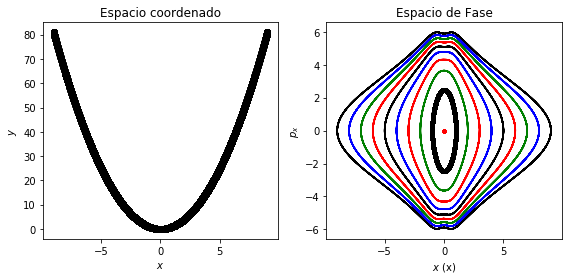

In [ ]:
fig,axs=plt.subplots(1,2,figsize=(8,4))
for i in range(10):
    y=[i,0.0]
    ts=np.linspace(0,10.0,10000)


    solucion=odeint(HE_pendulo,y,ts,args=(m,g))

    colors=np.array(['r.', 'k.', 'g', 'r-','b', 'k', 'r', 'g','b', 'k'])
    #Espacio coordenado
    x=(solucion[:,0])
    y=(solucion[:,0])**2
    axs[0].plot(x,y,'ko')
    axs[0].set_xlabel(r"$x$")
    axs[0].set_ylabel(r"$y$")
    axs[0].set_title("Espacio coordenado")

    #Espacio de Fase
    axs[1].plot(solucion[:,0],solucion[:,1],colors[i])

    axs[1].set_xlabel(r"$x$ (x)")
    axs[1].set_ylabel(r"$p_x$")
    axs[1].set_title("Espacio de Fase")

    fig.tight_layout()

**2. Constantes de movimiento.**Para un sistema de dos grados de libertad que es descrito por el Hamiltoniano

$$H = q_1p_1 − q_2p_2 − aq_1^2 + bq_2^2,$$
muestre que
$$F_1 = \frac{p_1 − aq_1 }{q_2 }\qquad(1)$$
$$F_2 = q_1q_2 \qquad(2)$$

son constantes de movimiento.


**Solución**
Para reconocer si $F_1$ y $F_2$ son constantes de movimeinto, se  debe cumplir las siguientes condiciones,
$$\frac{\partial F}{\partial t}=0\qquad y \qquad \lbrace F,H\rbrace =0 $$
Como $F_1$ y $F_2$ no depneden del tiempo explicitamente, ambas cumplen la primera condición
$$\frac{\partial F_1}{\partial t}=0\qquad y \qquad \frac{\partial F_2}{\partial t}=0 .$$
Ahora es necesario determinar si cumplen la segunda condición.
Por definicion los cor chetes de Poisson tenemos.
\begin{eqnarray}
\lbrace F_1,H\rbrace&=&\frac{\partial F_1}{\partial q_1}\frac{\partial H}{\partial p_1}-\frac{\partial F_1}{\partial p_1}\frac{\partial H}{\partial q_1}+\frac{\partial F_1}{\partial q_2}\frac{\partial H}{\partial p_2}-\underbrace{\frac{\partial F_1}{\partial p_2}}_{\mbox 0}\frac{\partial H}{\partial q_2},\\
\lbrace F_2,H\rbrace&=&\frac{\partial F_2}{\partial q_1}\frac{\partial H}{\partial p_1}-\underbrace{\frac{\partial F_2}{\partial p_1}}_{\mbox{0}}\frac{\partial H}{\partial q_1}+\frac{\partial F_2}{\partial q_2}\frac{\partial H}{\partial p_2}-\underbrace{\frac{\partial F_2}{\partial p_2}}_{\mbox 0}\frac{\partial H}{\partial q_2},
\end{eqnarray}
donde el termino  subrayado es igual a cero porque $F_1$ no depende de $p_2$ y $F_2$ no depende de $p_1$ y $p_2$.
Desarrolando los terminos resultantes tenemos :
\begin{eqnarray}
\lbrace F_1,H\rbrace&=&\frac{\partial F_1}{\partial q_1}\frac{\partial H}{\partial p_1}-\frac{\partial F_1}{\partial p_1}\frac{\partial H}{\partial q_1}+\frac{\partial F_1}{\partial q_2}\frac{\partial H}{\partial p_2},\\
\lbrace F_1,H\rbrace&=&-\frac{a}{q_2}q_1-\frac{1}{q_2}(p_1-2aq_1)+(-\frac{p_1-aq_1}{q_2^2})(-q_2),\\
\lbrace F_1,H\rbrace&=&-\frac{aq_1}{q_2} -\frac{p_1}{q_2}+\frac{2aq_1}{q_2}+\frac{p_1}{q_2}-\frac{aq_1}{q_2},\\
\lbrace F_1,H\rbrace&=&\left(-\frac{2aq_1}{q_2} +\frac{2aq_1}{q_2}\right)+\left(\frac{p_1}{q_2}-\frac{p_1}{q_2}\right)=0,\\\\
\lbrace F_2,H\rbrace&=&\frac{\partial F_2}{\partial q_1}\frac{\partial H}{\partial p_1}+\frac{\partial F_2}{\partial q_2}\frac{\partial H}{\partial p_2},\\
\lbrace F_2,H\rbrace&=&q_2q_1+(-q_1)(q_2)=0.
\end{eqnarray}


---
<center>
Tabla con las Derivadas parciales de $F_1$, $F_2$ y $H$ respecto a las variabels generalizadas $q_1$,$q_2$y sus momentos $p_1$,$p_2$
<end><center>

\begin{align}
&&\textit{Identidades para } F_1&&\\
\frac{\partial F_1}{\partial q_1}&=& \frac{\partial ((p_1 − aq_1 )/q_2)}{\partial q_1}&=&\frac{-a}{q_2},\\
\frac{\partial F_1}{\partial q_2}&=& \frac{\partial ((p_1 − aq_1)/ q_2)}{\partial q_2}&=&-\frac{p_1-aq_1}{q_2^2},\\
\frac{\partial F_1}{\partial p_1}&=& \frac{\partial ((p_1 − aq_1)/ q_2)}{\partial p_1}&=&\frac{1}{q2},\\
&&\textit{Identidades para } F_2&&\\
\frac{\partial F_2}{\partial q_1}&=& \frac{\partial (q_1 q_2)}{\partial q_1}&=&q_2,\\
\frac{\partial F_2}{\partial q_2}&=& \frac{\partial (q_1 q_2)}{\partial q_2}&=&q_1,\\
&&\textit{Identidades para } H&&\\
\frac{\partial H}{\partial q_1}&=& \frac{\partial (q_1p_1 − q_2p_2 − aq_1^2 + bq_2^2)}{\partial q_1}&=&p_1-2aq_1,\\
\frac{\partial H}{\partial q_2}&=& \frac{\partial (q_1p_1 − q_2p_2 − aq_1^2 + bq_2^2)}{\partial q_2}&=&-p_2-2bq_2,\\
\frac{\partial H}{\partial p_1}&=& \frac{\partial (q_1p_1 − q_2p_2 − aq_1^2 + bq_2^2)}{\partial p_1}&=&q_1,\\
\frac{\partial H}{\partial p_2}&=& \frac{\partial (q_1p_1 − q_2p_2 − aq_1^2 + bq_2^2)}{\partial p_2}&=&-q_2.\\
\end{align}


---



**3. Rueda sin deslizar.** 
Una esfera maciza de radio r rueda sin deslizar en un plano vertical sobre un cascarón esférico cóncavo hacia arriba de radio $R > r$.

**a)** Encuentre la función Hamiltoniana para este sistema.

**b)** Escriba las ecuaciones de movimiento.

**c)** Encuentre la posición de equilibrio del sistema y la frecuencia de pequeñas oscilaciones alrededor de esa posición.


**Solución**

![Figura 1](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSY9V40TM7fu6UfUhFw9lPkCJWDDoS_IIm6k0S1qRhYdG-UQDCHhg&s)

**a)** Para encontrar la funcion Hamiltoniana del sisstema, es necesario encontrar la Energía cinetica del problema $T$ y la Energía potencial $U$.

La energía del  en movimiento del cuerpo es $T=E_c +E_r$, donde $E_c$ es la energia cinética y $E_r $ es la energia rotacional

$$T=\frac{1}{2}mv^2+ \frac{1}{2} I w^2=\frac{1}{2}m(\dot x^2+ dot y^2)+ \frac{1}{2} I w^2$$
Y la energia potencial es
$$U=mgh=mgy$$

**Restricciones**
Como el probelema se situa sobre el plano $xy$ tiene una restriccioón, ya que esta nunca tiene movimiento en $z$, ademasel movimiento se restringe a $x^2+y^2=l$, donde $l$ es la distancia del origen de coordenadas al centro de la esfera.
Por ultimo esta esfera rueda sin deslizar por tanto esta gira unicamento sobre uno de sus ejes cuyo coordenada vamos a llamr $\varphi$

**Variables generalizadas**
El movimiento descrito por la esfera se puede describir univocamente, usando una variable generalizada, en este caso $\theta$ y $\varphi$

reescribiendo lo anterior en terminos de las variables generalizadas tenemos
\begin{align}
l&=&R-r\\
y&=&l \cos (\theta)\\
x&=&l \sin (\theta)\\
\textit{Y sus primeras derivadas}\\
\dot y&=&-l \sin (\theta) \dot \theta\\
\dot x&=&l \cos (\theta) \dot\theta\\
\end{align}

Como es una esfera macida de densidad constante posee un momento de Inercia $I=\frac{1}{2}mr^2$ y una velocidad angular de $\dot \varphi$

En este nuevo sistema de coordenadas,La energia se reescribe así:
$$T=\frac{1}{2}m(\dot x^2+ \dot y^2)+ \frac{1}{2} I w^2=\frac{1}{2}m((l \cos (\theta)\dot\theta)^2+ (-l \sin (\theta)\dot\theta)^2)+ \frac{1}{2} I (\dot{\varphi})^2$$
$$T=\frac{1}{2}ml^2\dot \theta^2+\frac{1}{5}mr^2\dot{\varphi}^2$$
Hasta aca tenemos el sistema en terminos de dos variables generalizadas, pero existe una ultima restriccion que nos relacionar la variable $\varphi$ con la veriable $\theta$, esta ligadura surge de la condicion de rodar sin deslizar, lo que indica que la lungitud de arco que recorre la esfera sobre el cascaron, es el mismo   
Y tomando el cero de potencial en la parte inferior del cascaron se obtiene que  energía potencial es
$$U=mg(-l \cos \theta)=-mgl\cos(\theta)$$
Ahora es posible ver que existe otra restrición analisando la siguiente image

<center>
<a href="https://ibb.co/jZwcS4q"><img src="https://i.ibb.co/Z1gn0Tv/Cascaron-esferico-1.jpg" alt="Cascaron-esferico-1" border="0"></a>
</center>


Gracias a la condicion de no deslizar, es posible ver en la figura anterior que la sistancia $S_{\theta}$ que recorre la esfera en un angulo $\theta$ es igual a la distancia $S_{\varphi}$ que rodo la esféra en un angulo $\varphi$, 

$$S_{\theta}=R\theta,$$
$$S_{\varphi}=r\varphi,$$
$$\boxed{\varphi=\frac{R}{r}\theta}$$

derivando la relación anterior y reemplazando en la energia cinetica optenemos.

$$T=\frac{1}{2}ml^2\dot \theta^2+\frac{1}{5}mr^2\frac{R^2}{r^2}\dot{\theta}^2=\frac{1}{2}ml^2\dot \theta^2+\frac{1}{5}m{R^2}\dot{\theta}^2,$$
$$T=mR^2\dot\theta^2\left(\frac{l^2}{2 R^2}+\frac{1}{5}\right)=mR^2\dot\theta^2\left(\frac{1}{2}\left(1-\frac{r}{R}\right)^2+\frac{1}{5}\right)$$
Con esto podemos escribir el lagrangiano
$$L=mR^2\dot\theta^2\left(\frac{1}{2}\left(1-\frac{r}{R}\right)^2+\frac{1}{5}\right)+mgl\cos\theta$$
Para hallar los momentos generalizados se deriva el lagrangiano respectoa a $\dot\theta$.
$$P_{\theta}=\frac{\partial L}{\partial \dot\theta}=mR^2\dot\theta\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right) $$

$$\dot\theta=\dfrac{p_{\theta}}{mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}$$
El lagrangiano $L_{qp}$ se escribe de la siguiente manera

$$L_{qp}=mR^2\left(\dfrac{p_{\theta}}{mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}\right)^2\left(\frac{1}{2}\left(1-\frac{r}{R}\right)^2+\frac{1}{5}\right)+mgl\cos\theta$$
$$L_{qp}=\dfrac{P_{\theta}}{4mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}+mgl\cos\theta$$
En este caso, es posible decir que el Hamiltoniano del sistema es la suma de la energia potencial y la cinetica,

por tanto, $$H=\dfrac{P_{\theta}^2}{2mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}-mgl\cos\theta$$

$$\boxed{H=\dfrac{P_{\theta}^2}{2mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}-mg(R-r)\cos(\theta)}$$


**b)** Las ecuaciones de movimeinto estan dadas por las ecuaciones de Hamilton
$$
\boxed{
\left\{
\begin{split}
\dot q_j & = & +\frac{\partial H}{\partial p_j}\\
\dot p_j & = & -\frac{\partial H}{\partial q_j}
\end{split}
\right\}_M}\qquad(3.2)
$$
Primero encontremos las variables generalizadas
\begin{eqnarray}
\dot \theta & = & \frac{\partial H}{\partial p_{\theta}}=  \dfrac{\partial \left(\dfrac{P_{\theta}^2}{2mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}-mg(R-r)\cos(\theta)\right)}{\partial p_{\theta}}\\
\dot \theta & = & \dfrac{P_{\theta}}{mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}
\end{eqnarray}
Segundo encontremos los momentos generalizados

\begin{eqnarray}
\dot p_{\theta} & = & -\frac{\partial H}{\partial {\theta}}= - \dfrac{\partial \left(\dfrac{P_{\theta}^2}{2mR^2\left(\left(1-\frac{r}{R}\right)^2+\frac{2}{5}\right)}-mg(R-r)\cos(\theta)\right)}{\partial {\theta}}\\
\dot p_{\theta} & = & -mg(R-r)\sin\theta
\end{eqnarray}

**c)**
LA e

Podemos encontrar la posicion de equilibrio $\theta=\theta_{eq}$ donde se puede ver que la posicion de equilibrio es esta en $\theta=0$, ya que esta esfera se comporta como un pendulo físico con frecuencia $\ddot \theta+w\sin\theta=0$
Las pequeñas oscilaciones se porduccen al expandir la funcion enseries de Tylor alrededor del punto que equilibrio
$$
f(\theta{})=f(\theta)+f^{\prime}(\theta_{eq})(\theta-\theta_{eq})+\frac{f^{\prime \prime}(\theta_{eq})(\theta-\theta_{eq})^2}{2}+\frac{f^{\prime \prime\prime}(\theta_{eq})(\theta-\theta_{eq})^2}{2}+.....
$$
lo que obtenemos es
$$
\sin(\theta{})=sin(\theta)+\cos(\theta_{eq})(\theta-\theta_{eq})-\frac{\sin(\theta_{eq})(\theta-\theta_{eq})^2}{2}-\frac{cos(\theta_{eq})(\theta-\theta_{eq})^2}{2}+.....
$$
$$
\sin\theta \thickapprox \theta
$$


**4. Partícula en un campo electromagnético.** Para una partícula de masa $m$, carga $q$ y velocidad $v$ en un campo electromagnético definido por los campos escalar y vectorial $\Phi$ y $\vec{A}$, demuestre que el Hamiltoniano de este sistema (en coordenadas cartesianas) puede escribirse como:
$$
H = \frac{1} {2m} (\vec{p} − q\vec{A})^2 + q\phi
$$
donde $p$ contiene el momento canónico conjugado asociado a cada una de las variables $x$, $y$, $z$.


 De los resultados básicos de la teoría electromagnética se sabe que una partícula de masa $m$ moviéndose con velocidad $\vec{v}$ respecto a un campo electromagnético, puede describirse mediante el siguiente lagrangiano 

$$L=\frac{1}{2}mv^{2}-q\phi+q\vec{A}\cdot\vec{v},$$

donde los campos eléctrico $\vec{E}$ y magnético $\vec{B}$ pueden derivarse a partir de los campos $\phi$ (el potencial escalar) y $\vec{A}$ (el potencial vectorial) como,
\begin{eqnarray}
\vec{E}&=&-\nabla\phi-\frac{\partial\vec{A}}{\partial t}\qquad&(4.1)\\\vec{B}&=&\nabla\times\vec{A}&(4.2).
\end{eqnarray}

El lagrangiano en el sistema cartesiano es:
$$
L=\frac{1}{2}m\left(\dot{x}^{2}+\dot{y}^{2}+\dot{z}^{2}\right)-q\phi\left(x,y,z\right)+q\left(A_{x}\dot{x}+A_{y}\dot{y}+A_{z}\dot{z}\right)\qquad(4.3).
$$
Ahora tomando unicamente la cordenada $x$ se tiene.
$$
L_{x}=\frac{1}{2}m\left(\dot{x}^{2}\right)-q\phi\left(x\right)+q\left(A_{x}\dot{x}\right),
$$
donde se puede encontrar los momentos generalizados,

\begin{eqnarray}
p_x&=& \frac{\partial L}{\partial \dot x}= m\dot x +qA_x,\\
\dot x&=& \frac{p_x}{m}-\frac{qA_x}{m}.
\end{eqnarray}
Es posible ahora encontrar el lagrangiano $L_{qp}$ en la coordenada $x$,
$$L_{qp_{x}}=\frac{1}{2}m\left(\frac{p_x}{m}-\frac{qA_x}{m}\right)^2-q\phi\left(x\right)+q\left(A_{x}\frac{p_x-qA_x}{m}\right),$$
$$L_{qp_{x}}=\frac{1}{2m}\left({p_x}-{qA_x}\right)^2-q\phi\left(x\right)+\frac{q}{m}\left({A_{x}p_x-qA_x^2}\right),$$

Ahora sepuede encontrar el Hamiltoniano para $x$
\begin{eqnarray}
H_x&=&p_x \dot x-L_{qp}=p_x\left( \frac{p_x}{m}-\frac{qA_x}{m}\right)-\frac{1}{2m}\left({p_x}+{qA_x}\right)^2+q\phi\left(x\right)-\frac{q}{m}\left({A_{x}p_x-qA_x^2}\right)\\
H_x&=& \frac{1}{m}\left( {p_x}^{2}-{p_xqA_x}\right)-\frac{1}{2m}\left({p_x}-{qA_x}\right)^2+q\phi\left(x\right)-\frac{1}{m}\left(q{A_{x}p_x-q^2A_x^2}\right)\\
H_x&=& \frac{1}{m}\left( {p_x}^{2}-2{p_xqA_x}+q^2A_x^2\right)-\frac{1}{2m}\left({p_x}-{qA_x}\right)^2+q\phi\left(x\right)\\
H_x&=& \frac{1}{m}\left( {p_x}-qA_x\right)^2-\frac{1}{2m}\left({p_x}-{qA_x}\right)^2+q\phi\left(x\right)\\
&&\boxed{H_x=\frac{1}{2m}\left({p_x}-{qA_x}\right)^2+q\phi\left(x\right)}.
\end{eqnarray}
Gneralizando este Hamiltoniano para $y$ y $z$ se tiene
$$
\boxed{H = \frac{1} {2m} (\vec{p} − q\vec{A})^2 + q\phi}
$$
___


**5. Ecuaciones canónicas de Hamilton.** Dado el siguiente lagrangiano 
$$L(q, q ̇) = \frac{1}{2}q̇^2 + q\dot{q} + 3q^2
,$$
encuentre la función Hamiltoniana y solucione las ecuaciones canónicas.

**Solición**
EL primer paso para hallar el Hamiltoniano, es encontrar los momentos generalizados, para locual se deriva el lagrangiano respecto $\dot q_j$.
\begin{eqnarray}
p = &\frac{\partial L}{\partial \dot q}=\dot q +q \\
\textit{por tanto }\qquad \dot q  = & p-q
\end{eqnarray}

Reemplazando $\dot q$ en el lagrancgiano obtenemos $L_{qp}$
$$L(q, p) = \frac{1}{2}(p-q)^2 + q(p-q) + 3q^2,\\
L(q, p) = \frac{1}{2}(p^2+q^2-2qp) + qp-q^2 + 3q^2,\\
L(q, p) = \frac{1}{2}p^2 + \frac{3}{2}q^2.$$
Con esto es posible encontrar el Hamiltoniano del sistema
$$H=p\dot q-L_{qp}=p(p-q)-\frac{1}{2}p^2 - \frac{3}{2}q^2,$$
$$H=p^2-\frac{1}{2}p^2-pq- \frac{3}{2}q^2,$$
$$\boxed{H=\frac{1}{2}p^2-pq- \frac{3}{2}q^2}.$$

Una vez encontrado el Hamiltoniano, es facil hallar las ecuaciones de movimiento usando las ecuaciones de Hamilton $(3.2)$
\begin{align}
\boxed{
\left\{
\begin{split}
\dot p&=-p+3q\\
\dot q&=p-q
\end{split}
\right\}}\qquad(5.1)
\end{align}
Para resolver este sistema, se definen las siguientes variables
\begin{eqnarray}
\textit{Se define }\rightarrow &u=p+q \textit{ y }\rightarrow v&= p-q,\\
\textit{cuyas derivadas son } \rightarrow &\dot u=\dot p+\dot q \textit{ y }\rightarrow \dot v&= \dot p-\dot q.
\end{eqnarray}
Restando y sumando  las ecuaciones $(5.1)$ obtenemos
\begin{align}{}
\dot p - \dot q&=-2p+4q\\
\dot v&=4q-2p\\
\dot p + \dot q&= 2q\\
\dot u&=2q
\end{align}

**6. Canica en un aro rotante.** Una canica puede deslizarse alrededor de un aro de radio $R$ que no presenta fricción. El aro rota con una velocidad angular constante $ω$ alrededor de un diámetro vertical.
<center>
<a href="https://imgbb.com/"><img src="https://i.ibb.co/0BR6rDt/Captura-2.png" alt="Captura-2" border="0"></a>


**a)** Encuentre el Hamiltoniano en términos del ángulo $θ$ y su momento canónico conjugado.

**b)** Escriba las ecuaciones de movimiento Hamiltonianas.

**c)** ¿El Hamiltoniano coincide con la energía?, ¿El Hamiltoniano es una cantidad conservada?


**Solución**
$$T=\frac{1}{2}m(\dot x² + \dot y² +\dot z²)$$
$$U=mgz$$
Como tenemos restricciones sobre el sistema, los grados de libertad de este se reducen de mode que pasamos a usar $3$ variables a solo una $\theta$,ya que hay el cuerpo se mueve sobre el aro $R=cte$
En terminos de las variables generalizadas 
\begin{eqnarray}
x&=&R \sin\theta \cos\omega t\\
y&=&R \sin\theta \sin\omega t\\
z&=& -R \cos\theta 
\end{eqnarray}

En terminos de las velocidades generalizadas 
\begin{eqnarray}
\dot x&=&R \cos\theta \cos\omega t\dot \theta -\omega R \sin\theta \sin\omega t\\
\dot y&=&R \cos\theta \sin\omega t\dot \theta+\omega R \sin\theta \cos\omega t\\
\dot z&=&R \sin\theta\dot\theta 
\end{eqnarray}
___
Observemos como queda la velocidad en este nuevo sistema coordenado
___
\begin{align}
\dot x^2&=R^2 \cos^2\theta \cos^2\omega t\dot \theta^2 \\&+\omega^2 R^2 \sin^2\theta \sin^2\omega t-R^2 \cos\theta \cos\omega t\dot \theta \omega \sin\theta \sin\omega t\\
\dot y^2&=R ^2\cos^2\theta \sin^2\omega t\dot \theta^2\\&+\omega^2 R^2 \sin^2\theta \cos^2\omega t+R^2 \cos\theta \sin\omega t\dot \theta\omega  \sin\theta \cos\omega t\\
\dot z^2&=R^2 \sin^2\theta\dot\theta^2\\
&\textit{de las ecuaciones anteriores, se puede ver que el termino cruado se cancela,}\\& \textit{y que los terminos sin^2 + cos^2 dan como resultado 1 }\\
\dot x^2+\dot y^2 +\dot z^2=R^2cos^2\theta\dot \theta^2+\omega^2R^2\sin^2\theta+R^2 \sin^2\theta\dot\theta^2\\
\dot x^2+\dot y^2 +\dot z^2=R^2\dot\theta+\omega^2R^2\sin^2\theta.
\end{align}
___
Reemplazando estas cantidades en la energia cinetica y potencial se llega a:
Asi, la energia cinetica y potencial se puede escribir como
\begin{align}
T&=\frac{1}{2}mR^2(\dot\theta^2+\omega^2\sin\theta^2)\\
U&=-mgRcos\theta
\end{align}
Con lo cual es posible encontrar el lagrangiano
$$L=\frac{1}{2}mR^2(\dot\theta^2+\omega^2\sin\theta^2)+mgRcos\theta$$
Esposible encontrar los mometos conjugados
$$p_{\theta}=\frac{\partial l}{\partial \dot\theta }=mR^2\dot\theta$$
$$\dot {\theta}=\frac{P_{\theta}}{mR^2}$$
Ahora bien, como las variables dependen del tiempo no es posible escribir el Hamiltoniano del sistema como la suma de la energia cinetica mas la potencial, por tanto es necesario la definición:
$$L_{qp}=\frac{1}{2}mR^2\left(\frac{P_{\theta}}{mR^2}\right)^2+\frac{1}{2}mR^2\omega^2\sin\theta^2+mgRcos\theta$$
$$L_{qp}=\frac{1}{2mR^2}{P_{\theta}}^2+\frac{1}{2}mR^2\omega^2\sin\theta^2+mgRcos\theta$$
Con este  nuevo lagrangianose contruye el Hamiltoniano de la siguiente forma:
$$
H=p_{\theta}\dot\theta-L_{qp}=\frac{P_{\theta}^2}{mR^2}-\frac{1}{2mR^2}{P_{\theta}}^2+\frac{1}{2}mR^2\omega^2\sin\theta^2+mgRcos\theta
$$
$$H=\frac{1}{2}\frac{P_{\theta}^2}{mR²}-\frac{1}{2}mR^2\omega^2\sin^2\theta-mgRcos\theta$$


**b)**
Las ecuaciones de movimiento se construyen apartir de las ecuaciones $(3.2)$
$$\dot p_{\theta}=-\frac{\partial H}{\partial \theta}=mR^2\omega^2 \cos\theta-mgR\sin\theta$$
$$\dot {\theta}=\frac{P_{\theta}}{mR^2}$$
**c)**Este Hamiltoniano no coincide con la energia, ya que las variables son dependientes del tiempo, ademas no es una cantidad conservada, porque no existe simetria temporal

 **7. El Hamiltoniano de $\texttt{Henon-Heiles}$ I.** En 1964, M. Henon y C.Heiles estudiaban el movimiento de las estrellas alrededor del centro galáctico tratando de encontrar una tercera constante de movimiento a parte del momentum angular y la energía. Esto les llevo a proponer un potencial idealizado que restringía su acción solo al plano $x$, $y$. Este potencial se caracteriza por poseer dos términos cúbicos que involucran a las variables $x$, $y$ haciendo a las ecuaciones de movimiento resultantes no lineales y acopladas. El Hamiltoniano asociado es el Hamiltoniano de Hènon-Heiles que en coordenadas cartesianas se escribe como
$$
H =\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}(x^2 + y^2) + x^2y-\frac{1}{3}y^3\qquad(7.1)$$
a) ¿El Hamiltoniano de  $\texttt{Henon-Heiles}$  coincide con la energía?

b) Deduzca las ecuaciones Hamiltonianas de movimiento para una masa $m$ sometida a este potencial. Tenga en cuenta que $p_x = m\dot x$ y $p_y = m\dot y$.

c) Para un par de condiciones iniciales apropiadas (fije un valor de la energía y encuentre valores de las variables generalizadas que la satisfagan) integre numéricamente las ecua-ciones de movimiento usando el método de Euler y el integrador simplectico $\texttt{Leap-Frog}$(Consultar). Grafique el comportamiento de la energía como función del tiempo ¿Es la energía una cantidad conservada con ambos esquemas?

d) Grafique la trayectoria en el espacio de configuracion.

e) Grafique los contornos de nivel del potencial para distintos valores de la energıa $(E =1/6, 1/8, 1/12, 1/24, 0, 01)$ y relacione los resultados con el inciso anterior.

**Solucion**
*a)*El Hamiltoniano de $\texttt{Heon Heilesconcide}$ con la energia, ya que esta ecuación se asemeja  a la onstante de jacobi del problema restringido de los trescuerpos $CRTBP$.

Como el Hamiltoniano no depende explícitamente del tiempo y La energía potencial  $U({qj})$  solo depende de las coordenadas generalizadas, estas son condiciones necesarias y suficientes para que el Hamiltoniano sea igual a la energía mecánica  $H=T+U$ , por tanto la grafica del Hamiltoniano es igual a la energia mecanica.
Deduzca las ecuaciones Hamiltonianas de movimiento.





**b)**
Las ecuaciones canonicas de para este Hamiltoniano son



\begin{split}
\dot x & = & +\frac{\partial H}{\partial p_x} = ,\frac{p_x}{m} & & \dot y &=&\frac{\partial H}{\partial p_y} = \frac{p_y}{m}\\
\dot p_x & = & -\frac{\partial H}{\partial x}= -x(1+2y) \\ 
\dot p_y & = & -\frac{\partial H}{\partial y}= y^2-y-x^2
\end{split}

Las cuales se integran númericamente como se ve acontinuación.

In [ ]:
#Ecuación diferencial con las ecuaciones canonicas de Hamilton
def EoM(y,t):
    m=10
    dydt=[0,0,0,0]
    dydt[0]=y[2]*m
    dydt[1]=y[3]*m
    dydt[2]=-y[0]*(1.0+2*y[1])
    dydt[3]=y[1]**2-y[1]-y[0]**2

    return dydt


In [ ]:
#Condiciones iniciales
y=[0.0, 0.2, -0.5, 0.1] 
Nt=100
ts=np.linspace(0,100,Nt)
#solucion de las ecuaciones de movimiento de teta1 y teta2
solucion2=odeint(EoM,y,ts)

#full_output = 1

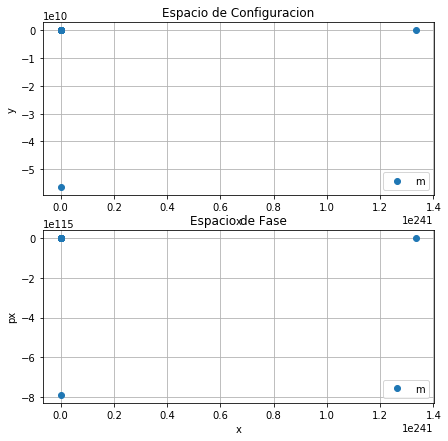

In [ ]:
#soluciones del sistema
X=solucion2[:,0] # solución de x
Y=solucion2[:,1] # solución de y
px=solucion2[:,2] # momento en x vx*m
py=solucion2[:,3] # momento en y vy*m
x=X
y=Y
#Grafico
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.plot(X,Y,"o",label="m")
plt.title("Espacio de Configuracion")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(X,px,"o",label="m")
plt.title("Espacio de Fase")
plt.ylabel("px")
plt.xlabel("x")
plt.legend()
plt.grid()

## Usando el metodo de Leapfroc

In [ ]:
#metodo de Euler
def euler(c,dt,m):
    x = c[0] + dt*c[2]/m  
    y = c[1] + dt*c[3]/m
    px = c[2] - dt*( c[0]+2*c[0]*c[1] )*m 
    py = c[3] - dt*( c[1] + c[0]**2 - c[1]**2 )*m 
    return x,y,px,py
#funcion de Leapfroc
def leapfrog(c,dt,m):
    px = c[2] - 0.5*dt*( c[0]+2*c[0]*c[1] )*m 
    x = c[0] + dt*px/m  
    px = px - 0.5*dt*( c[0]+2*c[0]*c[1] )*m 

    py = c[3] - 0.5*dt*( c[1] + c[0]**2 - c[1]**2 )*m 
    y = c[1] + dt*py/m
    py = py - 0.5*dt*( c[1] + c[0]**2 - c[1]**2 )*m 

    return x,y,px,py


x, px, y, py = 0.866, 0, -0.5, 0 #For a energy of 0.01
#x=0.5
#y=0
#px=-0.5
#py=0
c1 = [x,y,px,py]
c2 = c1
P = 100
N = 10000
dt = P/N
m = 1
t= 0 

N = 8*200
X,Y,PX,PY,T = np.ones(N),np.ones(N),np.ones(N),np.ones(N),np.ones(N)
X2,Y2,PX2,PY2 = np.ones(N),np.ones(N),np.ones(N),np.ones(N)
for i in range(N):
    T[i] = dt*i

    X[i],Y[i],PX[i],PY[i] = euler(c1,dt,m) 
    c1 = [X[i],Y[i],PX[i],PY[i]]

    X2[i],Y2[i],PX2[i],PY2[i] = leapfrog(c2,dt,m) 
    c2 = [X2[i],Y2[i],PX2[i],PY2[i]]

def E(X,Y,PX,PY,m): 
    return 1/(2*m)*(PX**2+PY**2)+0.5*(X**2+Y**2)*m + m*X**2*Y - 1/3.*Y**3

E1 = E(X,Y,PX,PY,m)
E2 = E(X2,Y2,PX2,PY2,m)



#Gráficas

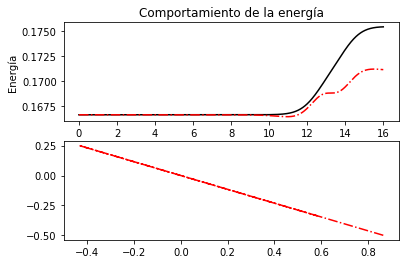

In [ ]:
plt.subplot(211)
plt.plot(T,E1,'-k')
plt.plot(T,E2,'-.r')
plt.title("Comportamiento de la energía")
plt.xlabel("tiempo")
plt.ylabel("Energía")

plt.subplot(212)
plt.plot(X2,Y2,'-.r')


#Espacio de configuración 

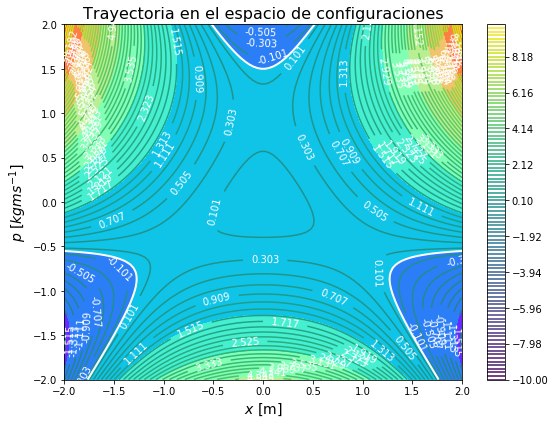

In [ ]:
def pot(x,y):
    return 0.5*(x**2+y**2) + (x**2*y - y**3/3.)



xext=2
xaxis=np.linspace(-xext,xext,100)

yext=2
yaxis=np.linspace(-yext,yext,100)

X,Y=np.meshgrid(xaxis, yaxis)
Z=pot(X,Y)


fig=plt.figure(figsize=(8,6))
ax=fig.gca()

plt.title('Trayectoria en el espacio de configuraciones',fontsize='16')
c=ax.contourf(X,Y,Z,10,cmap="rainbow")
c=ax.contour(X,Y,Z,np.linspace(-10,10,100))
cb=fig.colorbar(c)
c.clabel(colors='w')
c=ax.contour(X,Y,Z,[0],colors=['w'],linewidths=2)

xl=ax.set_xlabel(r"$x$ [m]",fontsize='14')
tl=ax.set_ylabel(r"$p$ $[kgms^{-1}]$",fontsize='14')

fig.tight_layout()
plt.show()

**8. El Hamiltoniano de Hénon-Heiles II**. Muestre que en coordenadas polares, el Hamiltoniano de $\texttt{Hénon-Heiles}$ se escribe como
$$
H = \frac{1}{2m}p_r^2+\frac{1}{2m}p_{\theta}^2+\frac{1}{2}r^2 +\frac{1}{2}r^3sin^3θ$$

**Solución**
Las coordenadas ($x$,$y$) en terminos de las polares( $r$,$\theta$) se escriben como:
$$y=r\sin\theta,\\x=r\cos\theta,$$
y las respectivas velocidades
$$\dot y=\dot r\sin\theta+r\cos\theta\dot{\theta},\\\dot x=\dot r\cos\theta-r\sin\theta\dot{\theta},$$

aplicando esta transdformacion a la ecuación $(7.1)$ tenemos:
\begin{align}
H &=\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}((r\sin\theta)^2 + (r\cos\theta)^2) + (r\cos\theta)^2r\sin\theta-\frac{1}{3}(r\sin\theta)^3,\\
H &=\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}r^2  + r^3\cos^2\theta\sin\theta-\frac{1}{3}r^3\sin^3\theta,\\
H &=\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}r^2  + r^3\cos^2\theta\sin\theta-\frac{1}{3}r^3\sin\theta(1-\cos^2\theta),\\
&\textit{Usando la identidad trigonométrica } \sin^2=(1-\cos\theta) \\
H &=\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}r^2  + \frac{2}{3}r^3\cos^2\theta\sin\theta-\frac{1}{3}r^3\sin\theta,\\
&\textit{Usando la identidad trigonométrica } \cos^2=(1-\sin\theta) \\
H &=\frac{p_x²}{2m}+\frac{p_y²}{2m}+\frac{1}{2}r^2  - \frac{2}{3}r^3\sin^3\theta+\frac{1}{3}r^3\sin\theta,\\
\end{align}
Observemos el lado de los momentos generalizados,

$$\frac{p_x^2+p_y^2}{2m}=\frac{m\dot x^2+m\dot y^2}{2m}=\frac{m (\dot r\sin\theta+r\cos\theta\dot{\theta})^2+m(\dot r\cos\theta-r\sin\theta\dot{\theta})^2}{2m}$$
$$\frac{m\left( \dot r^2\sin^2\theta+r^2\cos^2\theta\dot{\theta}^2+r\dot r\sin\theta\cos\theta\dot{\theta}+\dot r^2\cos^2\theta+r^2\sin^2\theta\dot{\theta}^2-r\dot r\sin\theta\cos\theta\dot{\theta}\right)}{2m}$$
\begin{align}
\textit{Elimiando los terminos cruzados la expresion se convierte en:}\\
\frac{m\left( \dot r^2\sin^2\theta+r^2\cos^2\theta\dot{\theta}^2+\dot r^2\cos^2\theta+r^2\sin^2\theta\dot{\theta}^2\right)}{2m}\\
\frac{m\left( \dot r^2(\sin^2\theta+ \cos^2\theta)+r^2\dot{\theta}^2(\cos^2\theta+\sin^2\theta)\right)}{2m}\\
\textit{Con esto es posible dividir la ecuación anterior en dos momentos generalizados, respecto a $r,\theta$}\\
\frac{p_x^2+p_y^2}{2m}=\frac{m\left( \dot r^2+r^2\dot{\theta}^2\right)}{2m}=\frac{p_r^2+p_{\theta}^2}{2m}
\end{align}
Con esto conseguimos la expresion requerida 
$$\boxed{H = \frac{1}{2m}p_r^2+\frac{1}{2m}p_{\theta}^2+\frac{1}{2}r^2 +\frac{1}{2}r^3sin^3θ}$$

**9. The Coplanar CRTBP.** Una partícula de prueba de masa $m$ se mueve sobre el plano de Laplace de otros dos cuerpos de masas $(1 − μ)$ y $μ$ las cuales son mucho mayores que $m$ y
determinan su dinámica. En este caso, el Hamiltoniano se escribe como
$$
H =\frac{p_x^2}{2m}+\frac{p_y^2}{2m}+ p_xy^{\prime} − p_yx^{\prime}− (1 − μ)\frac{m}{r_1}− μ\frac{m}{r_2}
$$
con $r_1 =\sqrt{({x^{\prime}} + μ)^2 + {y^{\prime}}^2}$ y $r_2 = \sqrt{ [x ^{\prime} − (1 − μ)]^2 + {y^{\prime}}^2}$ 
. Las variables primadas están referidas a un sistema que rota con velocidad angular constante igual a la unidad.

Encuentre las ecuaciones Hamiltonianas de movimiento para este sistema.

**Solución**



---
Derivadas de los vectores de posición

---

\begin{align}
\frac{\partial }{\partial x^{\prime}}\left(\frac{1}{r_1}\right)&=-\frac{x^{\prime}+\mu}{\left(({x^{\prime}} + μ)^2 + {y^{\prime}}^2\right)^{\frac{3}{2}}}&&=\frac{x^{\prime}+\mu}{r_1^3},\\
\frac{\partial }{\partial y^{\prime}}\left(\frac{1}{r_1}\right)&=-\frac{y^{\prime}}{\left(({x^{\prime}} + μ)^2 + {y^{\prime}}^2\right)^{\frac{3}{2}}}&&=\frac{y^{\prime}}{r_1^3},\\
\frac{\partial }{\partial x^{\prime}}\left(\frac{1}{r_2}\right)&=-\frac{x^{\prime}+\mu-1}{\left([x ^{\prime} − (1 − μ)]^2 + {y^{\prime}}^2\right)^{\frac{3}{2}}}&&=\frac{x^{\prime}+\mu-1}{r_2^3},\\
\frac{\partial }{\partial y^{\prime}}\left(\frac{1}{r_2}\right)&=-\frac{y^{\prime}}{\left([x ^{\prime} − (1 − μ)]^2 + {y^{\prime}}^2\right)^{\frac{3}{2}}}&&=\frac{y^{\prime}}{r_2^3},\\
\end{align}

---



De nuevo se usan las ecuaciones $3.2$, para encontrar las ecuaciones de movimeinto del sistema,
\begin{align}
\dot p_x &= -\frac{\partial H}{\partial  x^{\prime}}&=& -p_y+(1-\mu)m\frac{x^{\prime}+\mu}{r_1^3}+\mu\frac{x^{\prime}+\mu-1}{r_2^3},\\
\dot p_y &=-\frac{\partial H}{\partial x^{\prime}}&=& p_x +(1-\mu)m\frac{y^{\prime}}{r_1^3}+m\frac{y^{\prime}}{r_2^3},\\
\dot x &=\frac{\partial H}{\partial p_x} & = & \frac{p_x}{m}+y^{\prime},\\
\dot y &=\frac{\partial H}{\partial p_y} & = & \frac{p_y}{m}-x^{\prime}.
\end{align}
